# 1. Import the Necessary Package

In [1]:
import gym
import random
import torch
import numpy as np
import matplotlib.pyplot as plt
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

# 2. Instantiate the Environment 

In [2]:
from ff_env_discrete_modify_state import FFEnv, Viewer  # Environemnt

env = FFEnv()
print("State size :", env.state_size)
print("Action size : ", env.action_size)

State size : 7
Action size :  5


# 3. Instantiate the Agent

In [3]:
from dqn_agent import Agent

agent = Agent(state_size=7, action_size=5, seed=0)

# 4. Train the Agent with DQN

In [4]:
def dqn(n_episodes=1000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    for i_episode in range(1, n_episodes+1):
        state = env.reset()
        score = 0
        for t in range(max_t):
            action = agent.act(state, eps)
            next_state, reward, done = env.step(action)
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break 
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), 'checkpoint_modify_state.pth')
        if i_episode >= n_episodes:
            torch.save(agent.qnetwork_local.state_dict(), 'checkpoint_modify_state.pth')
            break
            
    return scores

scores = dqn()

Episode 100	Average Score: -81.42
Episode 200	Average Score: -58.73
Episode 300	Average Score: -28.22
Episode 400	Average Score: -27.26
Episode 500	Average Score: -30.64
Episode 600	Average Score: -42.12
Episode 700	Average Score: -45.86
Episode 800	Average Score: -35.82
Episode 900	Average Score: -25.65
Episode 1000	Average Score: -24.52


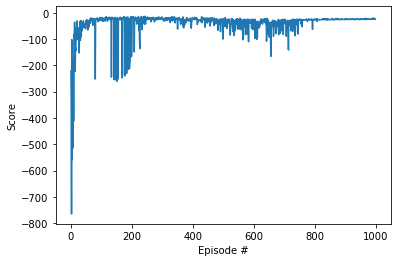

In [5]:
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

# 5. Evaluate

In [4]:
# load the weights from file
agent.qnetwork_local.load_state_dict(torch.load('checkpoint_modify_state.pth', map_location='cpu'))
import time
for i in range(1):
    state = env.reset()
    for j in range(200):
        action = agent.act(state)
        env.render()
        state, reward, done = env.step(action)
        time.sleep(0.1)
        if done:
            break 
path_x, path_y = env.viewer.return_path()      

#env.close()

goal pos :  388 228
obj_center :  276.2499948092726 118.75000333299337 | goal :  {'x': 388, 'y': 228, 'w': 25}
tl : 90.00000250447816  | tr : 71.02512910334661  | dl : 35.0 | dr : 30.822073
obj_center :  281.97903465113876 138.52970447450616 | goal :  {'x': 388, 'y': 228, 'w': 25}
tl : 87.65814237394507  | tr : 70.45217185463092  | dl : 44.205524 | dr : 30.822073
obj_center :  283.35125736826984 138.96979619992976 | goal :  {'x': 388, 'y': 228, 'w': 25}
tl : 87.11457542922794  | tr : 69.87921460591524  | dl : 44.695766 | dr : 30.822073
obj_center :  284.7250567566931 139.39957395065505 | goal :  {'x': 388, 'y': 228, 'w': 25}
tl : 86.57669803208944  | tr : 69.30625735719954  | dl : 45.183987 | dr : 30.822073
obj_center :  286.100504562419 139.8189636312418 | goal :  {'x': 388, 'y': 228, 'w': 25}
tl : 86.04431893723279  | tr : 68.73330010848386  | dl : 45.6702 | dr : 30.822073
obj_center :  287.4776194869719 140.22787779666032 | goal :  {'x': 388, 'y': 228, 'w': 25}
tl : 85.5172673899287

obj_center :  362.5952214209178 179.80531105793716 | goal :  {'x': 388, 'y': 228, 'w': 25}
tl : 66.21033751210787  | tr : 50.26031583775401  | dl : 79.54616 | dr : 49.46512
obj_center :  364.35149395117435 179.5258089728577 | goal :  {'x': 388, 'y': 228, 'w': 25}
tl : 65.78350533049543  | tr : 49.68735858903832  | dl : 79.95701 | dr : 49.46512
obj_center :  362.54804713194574 181.16031240835468 | goal :  {'x': 388, 'y': 228, 'w': 25}
tl : 66.35646257921111  | tr : 51.56881957328296  | dl : 79.95701 | dr : 57.2052
obj_center :  372.90088764512006 194.17740998450654 | goal :  {'x': 388, 'y': 228, 'w': 25}
tl : 65.37109167822089  | tr : 50.99586232456727  | dl : 86.92677 | dr : 57.2052
obj_center :  374.804028273403 193.78890971168062 | goal :  {'x': 388, 'y': 228, 'w': 25}
tl : 64.93628183565788  | tr : 50.422905075851574  | dl : 87.33709 | dr : 57.2052
obj_center :  376.70352055258206 193.38283126792703 | goal :  {'x': 388, 'y': 228, 'w': 25}
tl : 64.50307708754981  | tr : 49.8499478271

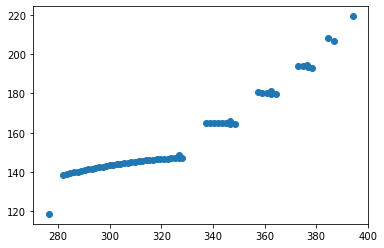

In [6]:
plt.scatter(path_x, path_y)
plt.show()